# Introduction
Install dataset and dependecies


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d CooperUnion/cardataset

Dataset URL: https://www.kaggle.com/datasets/CooperUnion/cardataset
License(s): unknown
  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 53.0MB/s]


In [ ]:
!unzip cardataset.zip

Archive:  cardataset.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("data.csv")

print(df.shape)

(11914, 16)


# Data Cleansing
## Data types

In [ ]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Removing un-used columns

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


Renaming for better looks

In [ ]:
df = df.rename(columns={
  "Engine HP": "HP",
  "Engine Cylinders": "Cylinders",
  "Transmission Type": "Transmission",
  "Driven_Wheels": "Drive Mode",
  "highway MPG": "MPG-H",
  "city mpg": "MPG-C",
  "MSRP": "Price"
})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


Removing duplicates from dataframe

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 11)


In [ ]:
df.drop_duplicates()
df.tail(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,50920
11913,Lincoln,Zephyr,2006,221.0,6.0,AUTOMATIC,front wheel drive,26,17,61,28995


Check for null values

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


There's a neglible amount of null values, that we can remove from our analysis. in the case of larger amount, we could've fillna it.

In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Popularity      0
Price           0
dtype: int64


Detecting outliers

In [ ]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
count,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,11816.000000,1.181600e+04
mean,2010.360190,249.514472,5.650051,26.319736,19.326845,1553.510833,4.057590e+04
std,7.594077,109.261297,1.752333,7.442964,6.527183,1439.969241,6.032038e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,26.000000,18.000000,1385.000000,2.996500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,2009.000000,4.220500e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: xlabel='Price'>

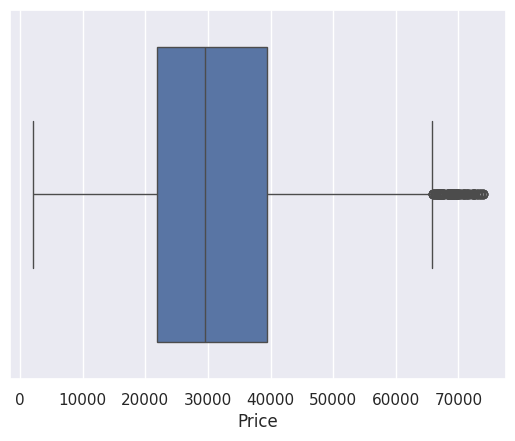

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

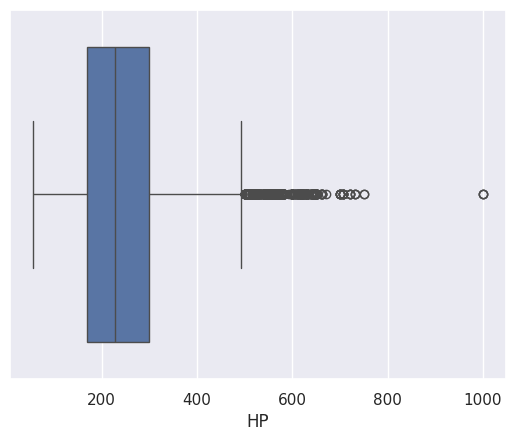

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

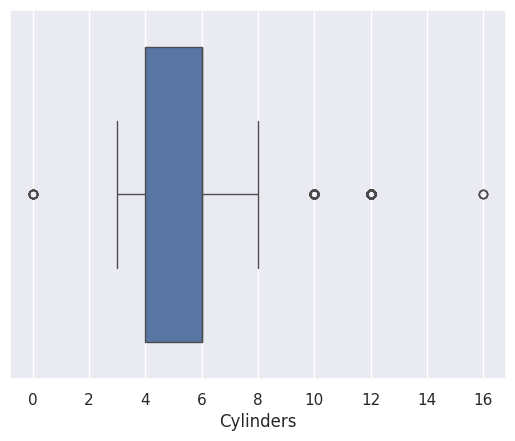

In [ ]:
sns.boxplot(x=df['Cylinders'])

<Axes: xlabel='Popularity'>

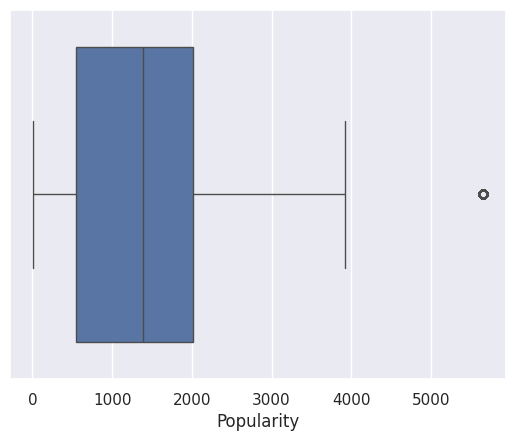

In [ ]:
sns.boxplot(x=df['Popularity'])

In [ ]:
numerical_cols = df.select_dtypes(include=np.number) # Select only the numerical columns
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21215.0
dtype: float64


In [ ]:
for col in numerical_cols.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
df.shape

(9054, 11)

# Visualization

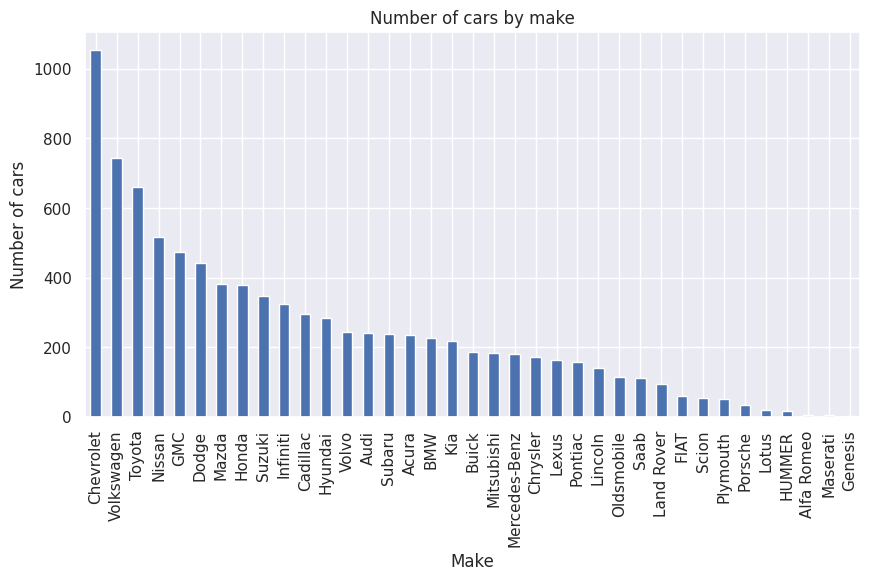

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

The bar chart shows the number of cars available for different brands. Chevrolet has the highest number, followed by Volkswagen, Toyota, Nissan, and GMC. These brands appear to be the most common in the dataset.

On the other hand, luxury and niche brands like Porsche, Alfa Romeo, Maserati, and Genesis have fewer cars, indicating they are less frequent.

This trend suggests that popular brands produce a wider range of models, while high-end brands focus on exclusivity.

Text(0, 0.5, 'Car Brand')

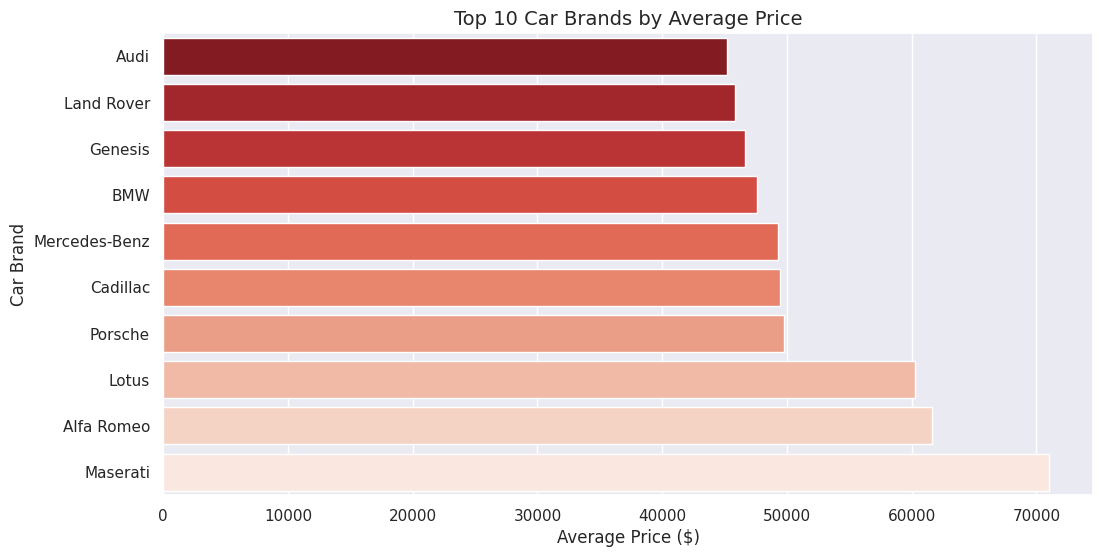

In [ ]:
plt.figure(figsize=(12,6))
avg_price_brand = df.groupby('Make')['Price'].mean().nlargest(10).sort_values()
sns.barplot(x=avg_price_brand.values, y=avg_price_brand.index, hue=avg_price_brand.index, palette="Reds_r", legend=False)
plt.title("Top 10 Car Brands by Average Price", fontsize=14)
plt.xlabel("Average Price ($)")
plt.ylabel("Car Brand")

- Maserati has the highest average price, exceeding $70,000, making it the most premium brand in the dataset.
- Alfa Romeo, Lotus, and Porsche follow closely, suggesting they are positioned as luxury or performance-oriented brands.
- Mercedes-Benz, BMW, and Audi are also in the top 10, reinforcing their reputation as high-end yet widely available manufacturers.
- Land Rover and Cadillac indicate strong presence in the luxury SUV and executive car segments.

Luxury brands like Maserati, Alfa Romeo, and Porsche dominate the high-end market, while premium brands like Mercedes-Benz, BMW, and Audi balance luxury and accessibility.

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.331045,-0.103871,0.362915,0.329151,0.202846,0.605823
HP,0.331045,1.000000,0.737088,-0.467776,-0.562446,0.109508,0.740422
Cylinders,-0.103871,0.737088,1.000000,-0.705080,-0.755770,0.030146,0.379489
MPG-H,0.362915,-0.467776,-0.705080,1.000000,0.938825,0.072418,-0.121129
MPG-C,0.329151,-0.562446,-0.755770,0.938825,1.000000,0.063520,-0.192756
Popularity,0.202846,0.109508,0.030146,0.072418,0.063520,1.000000,0.119780
Price,0.605823,0.740422,0.379489,-0.121129,-0.192756,0.119780,1.000000


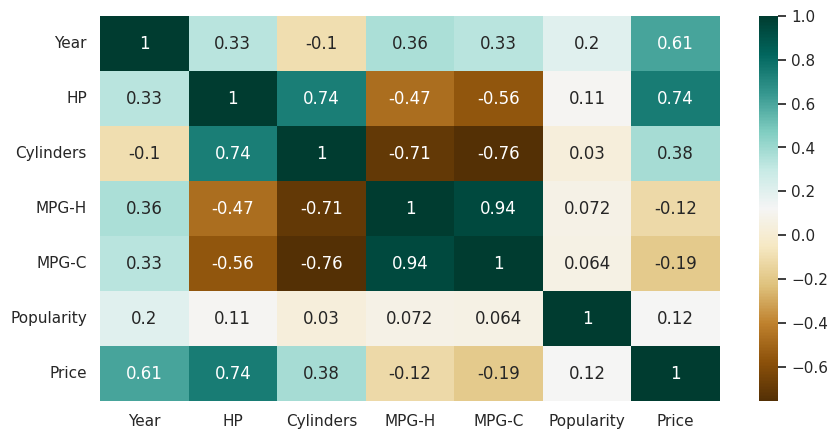

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c

The heatmap shows the relationships between different car features. A higher value (closer to 1) means a strong positive correlation, while a lower value (closer to -1) indicates a negative relationship.

Cars with higher horsepower and more cylinders are typically more expensive but less fuel-efficient, while newer cars tend to cost more.

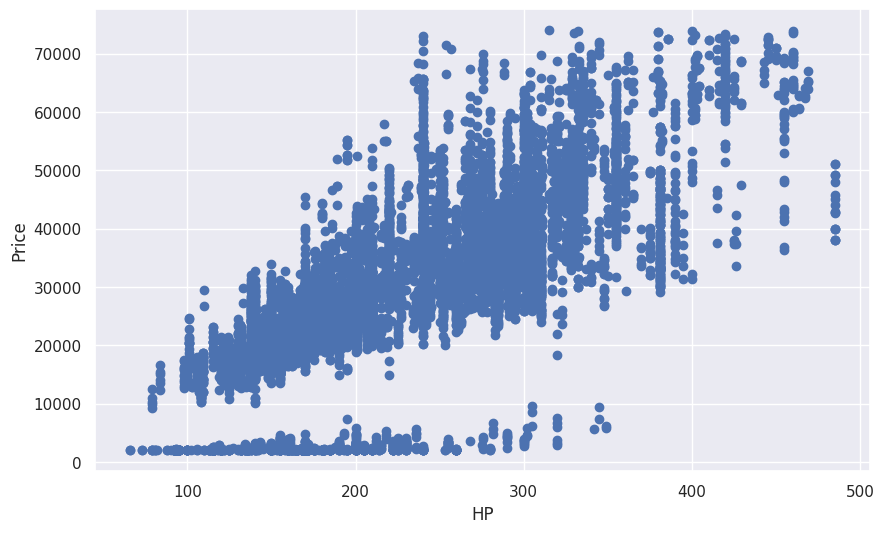

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Cars with more powerful engines tend to be more expensive, but other factors (brand, features, luxury level) also impact price differences.

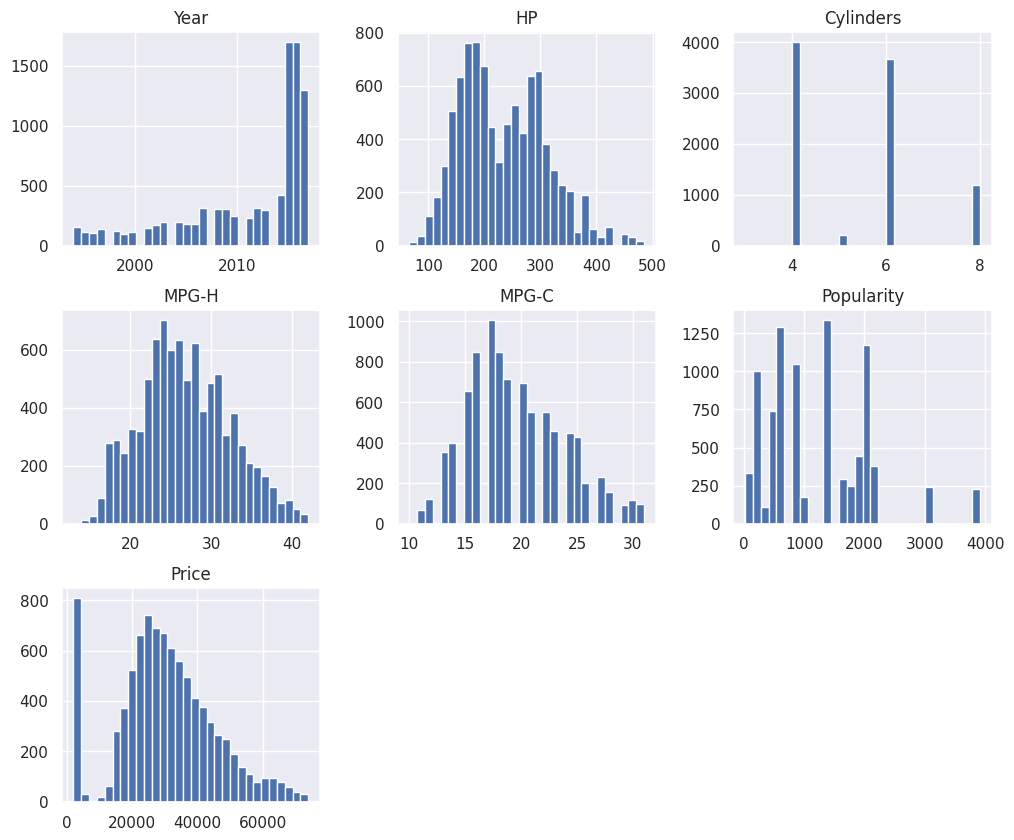

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

In [ ]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


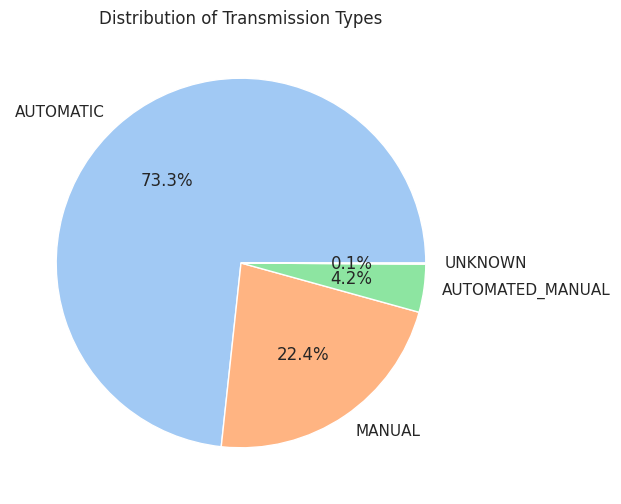

In [ ]:
plt.figure(figsize=(6, 6))
df["Transmission"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of Transmission Types")
plt.ylabel("")
plt.show()


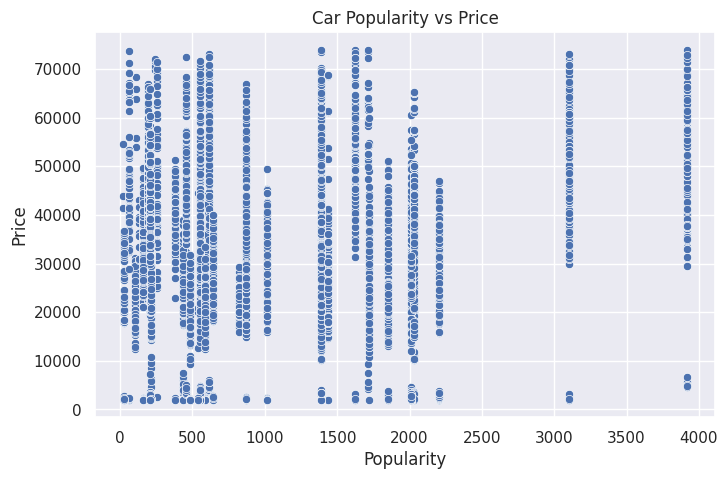

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Popularity"], y=df["Price"])
plt.title("Car Popularity vs Price")
plt.xlabel("Popularity")
plt.ylabel("Price")
plt.grid(True)
plt.show()

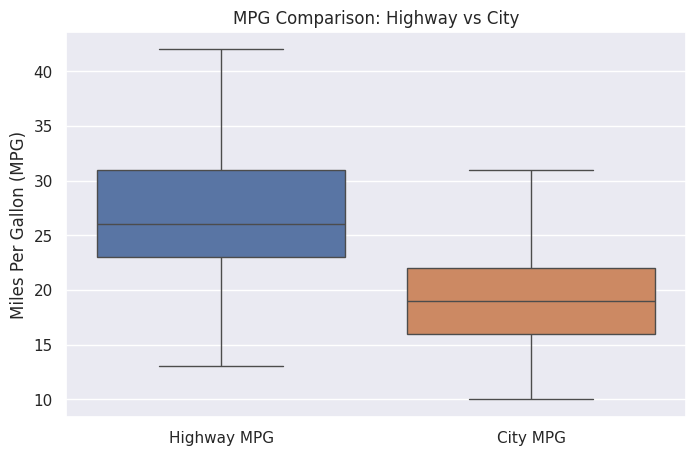

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["MPG-H", "MPG-C"]])
plt.title("MPG Comparison: Highway vs City")
plt.ylabel("Miles Per Gallon (MPG)")
plt.xticks(ticks=[0, 1], labels=["Highway MPG", "City MPG"])
plt.show()